In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

### a)

In [2]:
df = pd.read_csv("../data/compas-scores-two-years.csv")
df = df[df["days_b_screening_arrest"] <= 30]
df = df[df["days_b_screening_arrest"] >= -30]
df.drop([
    "id",
    "name",
    "first",
    "last",
    "dob",
    "violent_recid",
    "decile_score.1"
], axis=1, inplace=True)
df.head()

,compas_screening_date,sex,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,2013-08-14,Male,69,Greater than 45,Other,0,1,0,0,0,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,2013-01-27,Male,34,25 - 45,African-American,0,3,0,0,0,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,2013-04-14,Male,24,Less than 25,African-American,0,4,0,1,4,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
5,2013-11-30,Male,44,25 - 45,Other,0,1,0,0,0,...,1,Low,2013-11-30,2013-11-30,2013-12-01,0,1,853,0,0
6,2014-02-19,Male,41,25 - 45,Caucasian,0,6,0,0,14,...,2,Low,2014-02-19,2014-03-31,2014-04-18,14,5,40,1,1


In [3]:
print(df["age_cat"].unique())
print(df["race"].unique())
print(sorted(df["decile_score"].unique()))
print(sorted(df["juv_other_count"].unique()))
print(df["score_text"].unique())
print(df["event"].unique())
print(df["is_recid"].unique())

['Greater than 45' '25 - 45' 'Less than 25']
['Other' 'African-American' 'Caucasian' 'Hispanic' 'Asian'
 'Native American']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0, 1, 2, 3, 4, 5, 6, 7, 9]
['Low' 'Medium' 'High']
[0 1]
[0 1]


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6172 entries, 0 to 7213
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   compas_screening_date    6172 non-null   object 
 1   sex                      6172 non-null   object 
 2   age                      6172 non-null   int64  
 3   age_cat                  6172 non-null   object 
 4   race                     6172 non-null   object 
 5   juv_fel_count            6172 non-null   int64  
 6   decile_score             6172 non-null   int64  
 7   juv_misd_count           6172 non-null   int64  
 8   juv_other_count          6172 non-null   int64  
 9   priors_count             6172 non-null   int64  
 10  days_b_screening_arrest  6172 non-null   float64
 11  c_jail_in                6172 non-null   object 
 12  c_jail_out               6172 non-null   object 
 13  c_case_number            6172 non-null   object 
 14  c_offense_date           5388

In [5]:
df["two_year_recid"].value_counts()

two_year_recid
0    3363
1    2809
Name: count, dtype: int64

In [6]:
tab = list()
gjentakelsesrate = dict()
for race in df["race"].unique():
    temp_df = df.where(df["race"] == race)
    v = temp_df["two_year_recid"].value_counts()[[0, 1]].to_numpy(dtype=float)
    v /= v.sum()
    rate = temp_df["race"].value_counts()[race] / df["race"].value_counts().sum()
    tab.append([race, v[1], rate])
    gjentakelsesrate[race] = v[1]
for sex in df["sex"].unique():
    temp_df = df.where(df["sex"] == sex)
    v = temp_df["two_year_recid"].value_counts()[[0, 1]].to_numpy(dtype=float)
    v /= v.sum()
    rate = temp_df["sex"].value_counts()[sex] / df["sex"].value_counts().sum()
    tab.append([sex, v[1], rate])
    gjentakelsesrate[race] = v[1]
headers = ["Gruppe", "Andel som gjentar forbrytelse", "Andel i datsett"]
print(tabulate(tab, headers, tablefmt="mixed_grid"))

┍━━━━━━━━━━━━━━━━━━┯━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┯━━━━━━━━━━━━━━━━━━━┑
│ Gruppe           │   Andel som gjentar forbrytelse │   Andel i datsett │
┝━━━━━━━━━━━━━━━━━━┿━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┿━━━━━━━━━━━━━━━━━━━┥
│ Other            │                        0.361516 │        0.0555736  │
├──────────────────┼─────────────────────────────────┼───────────────────┤
│ African-American │                        0.52315  │        0.51442    │
├──────────────────┼─────────────────────────────────┼───────────────────┤
│ Caucasian        │                        0.39087  │        0.340732   │
├──────────────────┼─────────────────────────────────┼───────────────────┤
│ Hispanic         │                        0.371316 │        0.0824692  │
├──────────────────┼─────────────────────────────────┼───────────────────┤
│ Asian            │                        0.258065 │        0.00502268 │
├──────────────────┼─────────────────────────────────┼───────────────────┤
│ Native American  │     

In [7]:
def histogram(kolonne, gruppe):
    temp_df = df.where(df[kolonne] == gruppe)
    temp_df.dropna(subset=kolonne, inplace=True)

    fig, ax = plt.subplots(1, 2)

    h = np.histogram(temp_df["decile_score"], bins=np.arange(0.5, 11, 1))[0]
    h = np.asarray(h, dtype=float)
    h /= h.sum()
    ax[0].bar(np.arange(1, 11, 1), h)

    keys = ["Low", "Medium", "High"]
    counts = temp_df["score_text"].value_counts()[keys].to_numpy(dtype=float)
    counts /= counts.sum()
    ax[1].bar(keys, counts)

    ax[0].set_xlabel("Desil score")
    ax[1].set_xlabel("Score tekst")
    ax[0].set_ylabel("Andel av gruppen")
    ax[1].set_ylabel("Andel av gruppen")

    fig.set_size_inches(10,5)
    fig.suptitle("Det som ble predikert av algoritmen for " + kolonne + ": " + gruppe)

    plt.tight_layout()

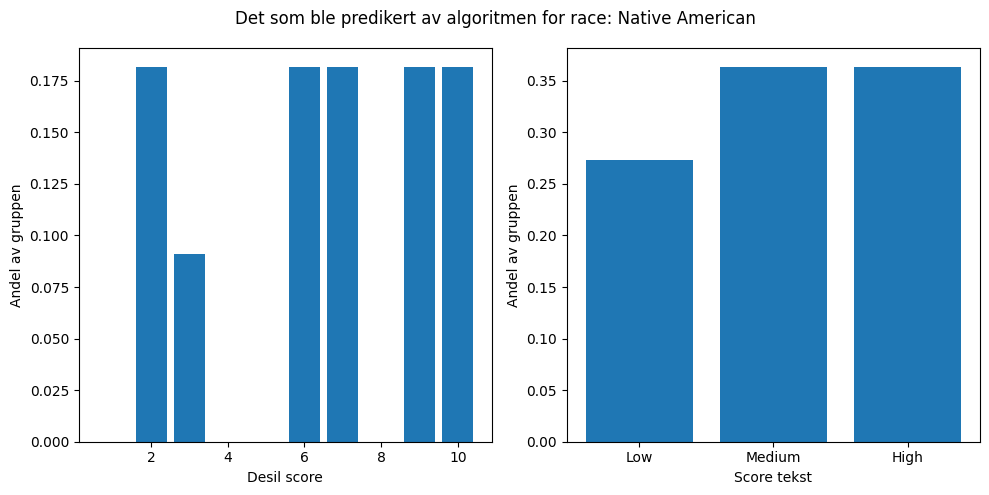

In [8]:
histogram("race", "Native American")

In [9]:
print(df["race"].unique())
print(df["sex"].unique())
print(df["score_text"].unique())

['Other' 'African-American' 'Caucasian' 'Hispanic' 'Asian'
 'Native American']
['Male' 'Female']
['Low' 'Medium' 'High']


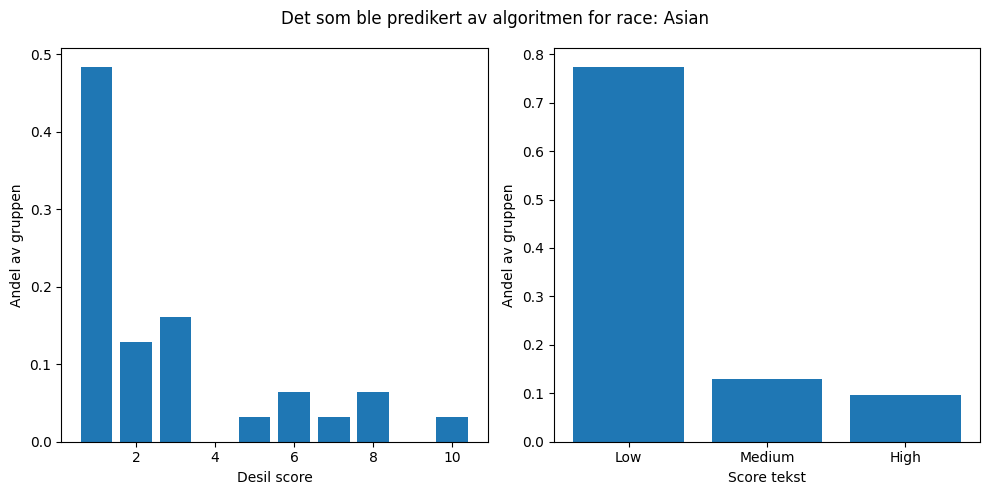

In [10]:
histogram("race", "Asian")

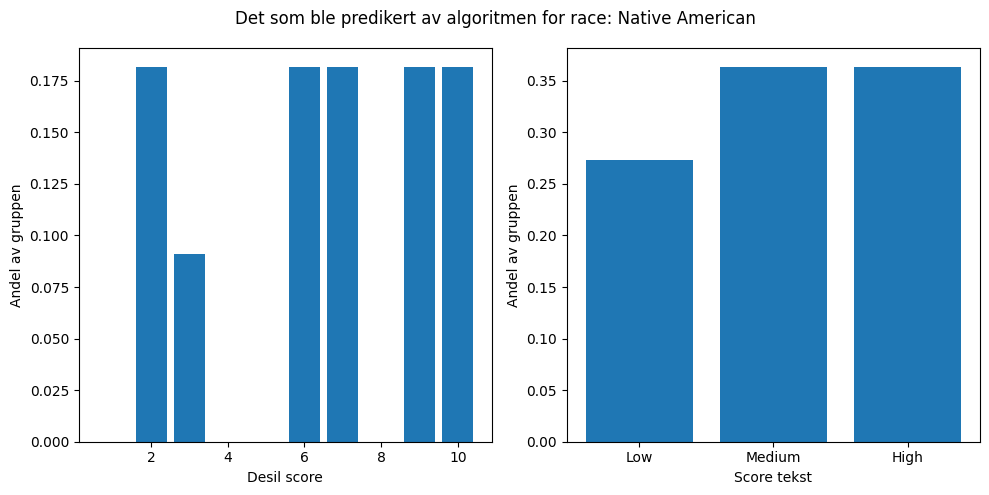

In [11]:
histogram("race", "Native American")

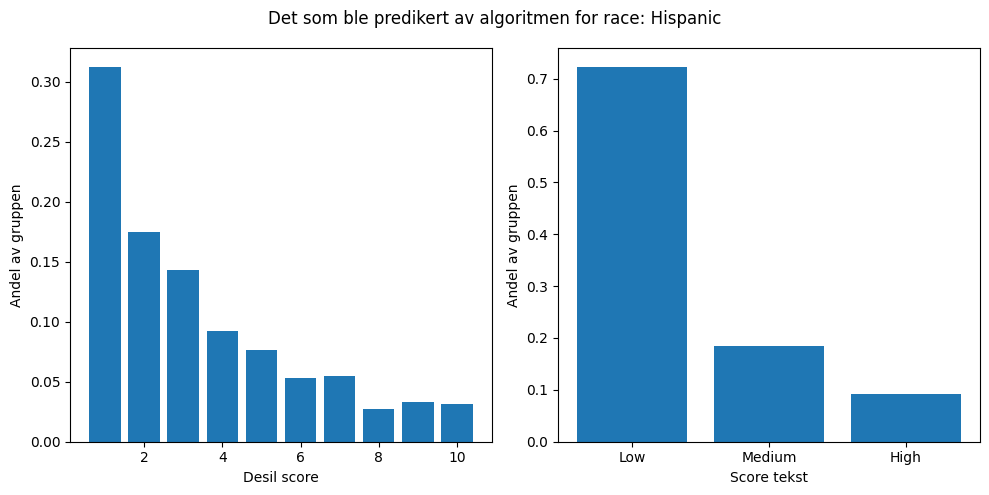

In [12]:
histogram("race", "Hispanic")

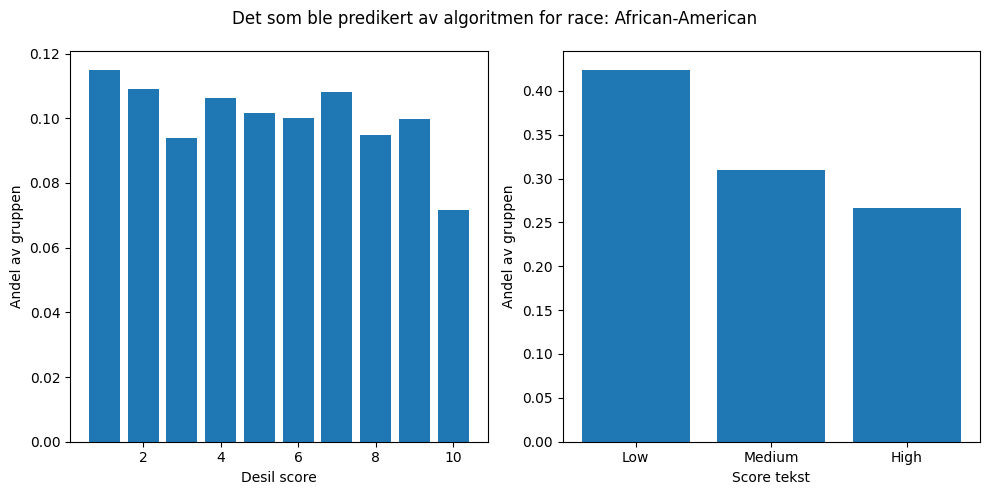

In [13]:
histogram("race", "African-American")

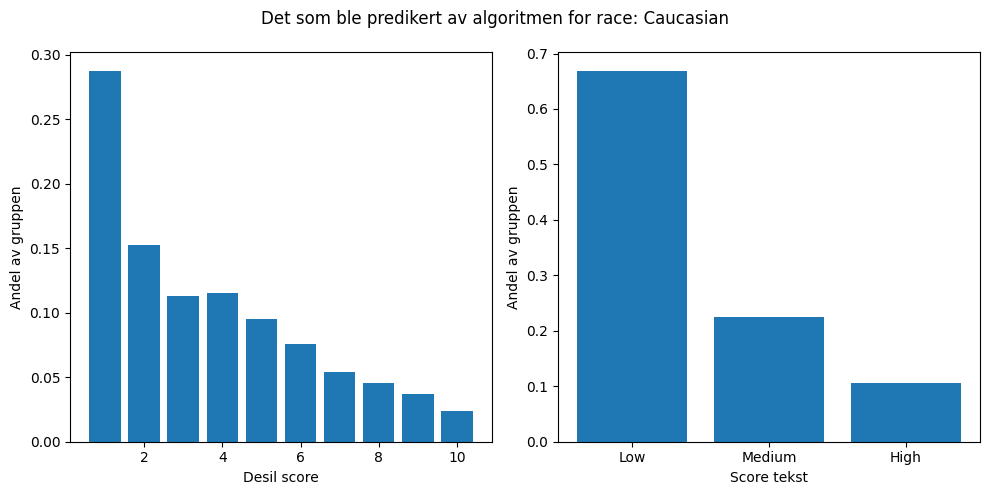

In [14]:
histogram("race", "Caucasian")

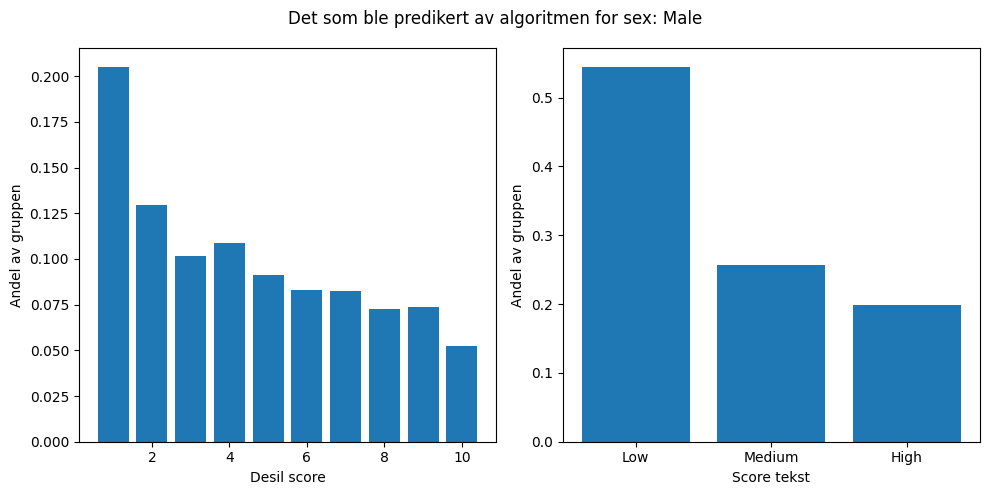

In [15]:
histogram("sex", "Male")

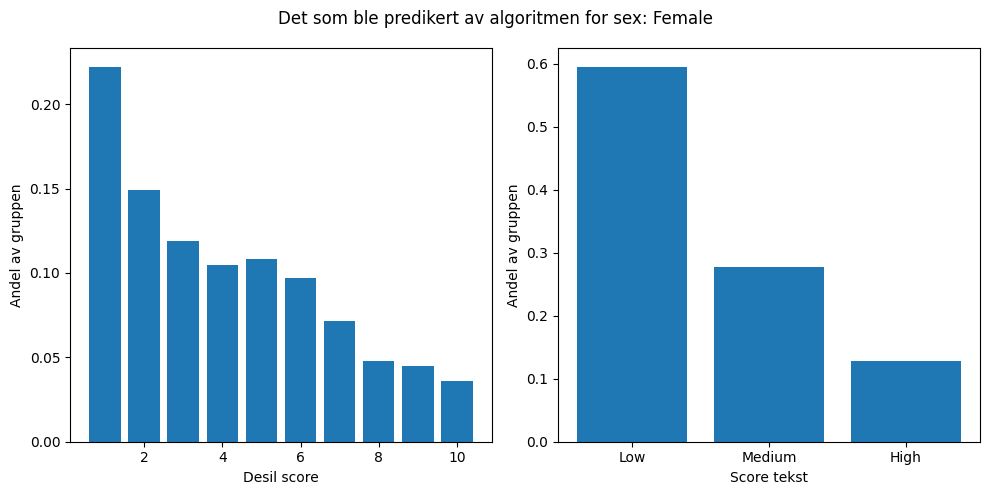

In [16]:
histogram("sex", "Female")

In [17]:
na = df.where(df["race"] == "Native American")
na.dropna(subset="race", inplace=True)
na.shape

(11, 46)

Ser at modellen predikerer at afroamerikanere gjevnt over har mye høyere risiko for å gjøre en ny kriminell handling innen to år. Ser at asiatere gis mye lavere risiko. Amerikanske urfolk har en meget rar fordeling, men det er kun 11 datapunkter der så det er vanskelig å trekke noen konklusjoner om hvordan algoritmen ser på dem over lag. 

In [18]:
na = df.where(df["is_recid"] == 1)
print(na.shape)
na.dropna(subset="r_case_number", inplace=True)
na.shape

(6172, 46)


(2990, 46)

### b)

Sann positiv: $P(1 \cap high)$\
Falsk positiv: $P(0 \cap high)$\
Sann negativ: $P(0 \cap low)$\
Falsk negativ: $P(1 \cap low)$

Positiv prediktiv verdi: $P(1|high)$

In [19]:
# Finner sann positiv verdi

recid = df["two_year_recid"].to_numpy()
score_text = df["score_text"].to_numpy()

# Finner indeksene der risikoen er Medium eller High
high_risk_index = np.where(score_text != "Low")

# Finner indeksene der recid = 1
recid_1_index = np.where(recid == 1)[0]

# Finner P(1 ∩ high)
sann_positiv = len(np.intersect1d(high_risk_index, recid_1_index))/len(recid)

# Finner P(1|high)
prediktiv = sann_positiv/(len(recid_1_index)/len(score_text))

tab = list()
tab.append(["Hele befolkningen", sann_positiv, prediktiv])

# Gjør det samme for rase
for race in df["race"].unique():
    temp_df = df.where(df["race"] == race)
    recid = temp_df['is_recid'].dropna().to_numpy()
    score_text = temp_df['score_text'].dropna().to_numpy()
    high_risk_index = np.where(score_text != "Low")[0]
    recid_1_index = np.where(recid == 1)[0]
    sann_positiv = len(np.intersect1d(high_risk_index, recid_1_index))/len(recid)
    prediktiv = sann_positiv/(len(high_risk_index)/len(score_text))
    tab.append([race, sann_positiv, prediktiv])

# Gjør det samme for kjønn
for sex in df["sex"].unique():
    temp_df = df.where(df["sex"] == sex)
    recid = temp_df['is_recid'].dropna().to_numpy()
    score_text = temp_df['score_text'].dropna().to_numpy()
    high_risk_index = np.where(score_text != "Low")[0]
    recid_1_index = np.where(recid == 1)[0]
    sann_positiv = len(np.intersect1d(high_risk_index, recid_1_index))/len(recid)
    prediktiv = sann_positiv/(len(high_risk_index)/len(score_text))
    tab.append([sex, sann_positiv, prediktiv])

headers = ["Gruppe", "Sann positiv verdi", "Prediktiv verdi"]
print(tabulate(tab, headers, tablefmt="mixed_grid"))

┍━━━━━━━━━━━━━━━━━━━┯━━━━━━━━━━━━━━━━━━━━━━┯━━━━━━━━━━━━━━━━━━━┑
│ Gruppe            │   Sann positiv verdi │   Prediktiv verdi │
┝━━━━━━━━━━━━━━━━━━━┿━━━━━━━━━━━━━━━━━━━━━━┿━━━━━━━━━━━━━━━━━━━┥
│ Hele befolkningen │             0.280784 │          0.616946 │
├───────────────────┼──────────────────────┼───────────────────┤
│ Other             │             0.125364 │          0.614286 │
├───────────────────┼──────────────────────┼───────────────────┤
│ African-American  │             0.393071 │          0.68234  │
├───────────────────┼──────────────────────┼───────────────────┤
│ Caucasian         │             0.20447  │          0.617816 │
├───────────────────┼──────────────────────┼───────────────────┤
│ Hispanic          │             0.165029 │          0.595745 │
├───────────────────┼──────────────────────┼───────────────────┤
│ Asian             │             0.193548 │          0.857143 │
├───────────────────┼──────────────────────┼───────────────────┤
│ Native American   │    

In [20]:
# Finner falsk positiv verdi

recid = df["two_year_recid"].to_numpy()
score_text = df["score_text"].to_numpy()

# Finner indeksene der risikoen er Medium eller High
high_risk_index = np.where(score_text != "Low")

# Finner indeksene der recid = 0
recid_0_index = np.where(recid == 0)[0]

# Finner P(0 ∩ high)
falsk_positiv = len(np.intersect1d(high_risk_index, recid_0_index))/len(recid)

tab = list()
tab.append(["Hele befolkningen", falsk_positiv])

# Gjør det samme for rase
for race in df["race"].unique():
    temp_df = df.where(df["race"] == race)
    recid = temp_df['is_recid'].dropna().to_numpy()
    score_text = temp_df['score_text'].dropna().to_numpy()
    high_risk_index = np.where(score_text != "Low")[0]
    recid_0_index = np.where(recid == 0)[0]
    falsk_positiv = len(np.intersect1d(high_risk_index, recid_0_index))/len(recid)
    tab.append([race, falsk_positiv])

# Gjør det samme for kjønn
for sex in df["sex"].unique():
    temp_df = df.where(df["sex"] == sex)
    recid = temp_df['is_recid'].dropna().to_numpy()
    score_text = temp_df['score_text'].dropna().to_numpy()
    high_risk_index = np.where(score_text != "Low")[0]
    recid_0_index = np.where(recid == 0)[0]
    falsk_positiv = len(np.intersect1d(high_risk_index, recid_0_index))/len(recid)
    tab.append([sex, falsk_positiv])

headers = ["Gruppe", "Falsk positiv verdi"]
print(tabulate(tab, headers, tablefmt="mixed_grid"))

┍━━━━━━━━━━━━━━━━━━━┯━━━━━━━━━━━━━━━━━━━━━━━┑
│ Gruppe            │   Falsk positiv verdi │
┝━━━━━━━━━━━━━━━━━━━┿━━━━━━━━━━━━━━━━━━━━━━━┥
│ Hele befolkningen │             0.164938  │
├───────────────────┼───────────────────────┤
│ Other             │             0.0787172 │
├───────────────────┼───────────────────────┤
│ African-American  │             0.182992  │
├───────────────────┼───────────────────────┤
│ Caucasian         │             0.126486  │
├───────────────────┼───────────────────────┤
│ Hispanic          │             0.111984  │
├───────────────────┼───────────────────────┤
│ Asian             │             0.0322581 │
├───────────────────┼───────────────────────┤
│ Native American   │             0.181818  │
├───────────────────┼───────────────────────┤
│ Male              │             0.142886  │
├───────────────────┼───────────────────────┤
│ Female            │             0.187234  │
┕━━━━━━━━━━━━━━━━━━━┷━━━━━━━━━━━━━━━━━━━━━━━┙


In [21]:
# Finner sann negativ verdi

recid = df["two_year_recid"].to_numpy()
score_text = df["score_text"].to_numpy()

# Finner indeksene der risikoen er Medium eller High
low_risk_index = np.where(score_text == "Low")

# Finner indeksene der recid = 0
recid_0_index = np.where(recid == 0)[0]

# Finner P(0 ∩ low)
sann_negativ = len(np.intersect1d(low_risk_index, recid_0_index))/len(recid)

tab = list()
tab.append(["Hele befolkningen", sann_negativ])

# Gjør det samme for rase
for race in df["race"].unique():
    temp_df = df.where(df["race"] == race)
    recid = temp_df['is_recid'].dropna().to_numpy()
    score_text = temp_df['score_text'].dropna().to_numpy()
    low_risk_index = np.where(score_text == "Low")[0]
    recid_0_index = np.where(recid == 0)[0]
    sann_negativ = len(np.intersect1d(low_risk_index, recid_0_index))/len(recid)
    tab.append([race, sann_negativ])

# Gjør det samme for kjønn
for sex in df["sex"].unique():
    temp_df = df.where(df["sex"] == sex)
    recid = temp_df['is_recid'].dropna().to_numpy()
    score_text = temp_df['score_text'].dropna().to_numpy()
    low_risk_index = np.where(score_text == "Low")[0]
    recid_0_index = np.where(recid == 0)[0]
    sann_negativ = len(np.intersect1d(low_risk_index, recid_0_index))/len(recid)
    tab.append([sex, sann_negativ])

headers = ["Gruppe", "Sann negativ verdi"]
print(tabulate(tab, headers, tablefmt="mixed_grid"))

┍━━━━━━━━━━━━━━━━━━━┯━━━━━━━━━━━━━━━━━━━━━━┑
│ Gruppe            │   Sann negativ verdi │
┝━━━━━━━━━━━━━━━━━━━┿━━━━━━━━━━━━━━━━━━━━━━┥
│ Hele befolkningen │             0.379942 │
├───────────────────┼──────────────────────┤
│ Other             │             0.542274 │
├───────────────────┼──────────────────────┤
│ African-American  │             0.258583 │
├───────────────────┼──────────────────────┤
│ Caucasian         │             0.457917 │
├───────────────────┼──────────────────────┤
│ Hispanic          │             0.500982 │
├───────────────────┼──────────────────────┤
│ Asian             │             0.645161 │
├───────────────────┼──────────────────────┤
│ Native American   │             0.272727 │
├───────────────────┼──────────────────────┤
│ Male              │             0.345807 │
├───────────────────┼──────────────────────┤
│ Female            │             0.442553 │
┕━━━━━━━━━━━━━━━━━━━┷━━━━━━━━━━━━━━━━━━━━━━┙


In [22]:
# Finner falsk negativ verdi

recid = df["two_year_recid"].to_numpy()
score_text = df["score_text"].to_numpy()

# Finner indeksene der risikoen er Medium eller High
low_risk_index = np.where(score_text != "Low")

# Finner indeksene der recid = 1
recid_1_index = np.where(recid == 1)[0]

# Finner P(1 ∩ low)
falsk_negativ = len(np.intersect1d(low_risk_index, recid_1_index))/len(recid)

tab = list()
tab.append(["Hele befolkningen", falsk_negativ])

# Gjør det samme for rase
for race in df["race"].unique():
    temp_df = df.where(df["race"] == race)
    recid = temp_df['is_recid'].dropna().to_numpy()
    score_text = temp_df['score_text'].dropna().to_numpy()
    low_risk_index = np.where(score_text == "Low")[0]
    recid_1_index = np.where(recid == 1)[0]
    falsk_negativ = len(np.intersect1d(low_risk_index, recid_1_index))/len(recid)
    tab.append([race, falsk_negativ])

# Gjør det samme for kjønn
for sex in df["sex"].unique():
    temp_df = df.where(df["sex"] == sex)
    recid = temp_df['is_recid'].dropna().to_numpy()
    score_text = temp_df['score_text'].dropna().to_numpy()
    low_risk_index = np.where(score_text == "Low")[0]
    recid_1_index = np.where(recid == 1)[0]
    falsk_negativ = len(np.intersect1d(low_risk_index, recid_1_index))/len(recid)
    tab.append([sex, falsk_negativ])

headers = ["Gruppe", "Falsk negativ verdi"]
print(tabulate(tab, headers, tablefmt="mixed_grid"))

┍━━━━━━━━━━━━━━━━━━━┯━━━━━━━━━━━━━━━━━━━━━━━┑
│ Gruppe            │   Falsk negativ verdi │
┝━━━━━━━━━━━━━━━━━━━┿━━━━━━━━━━━━━━━━━━━━━━━┥
│ Hele befolkningen │              0.280784 │
├───────────────────┼───────────────────────┤
│ Other             │              0.253644 │
├───────────────────┼───────────────────────┤
│ African-American  │              0.165354 │
├───────────────────┼───────────────────────┤
│ Caucasian         │              0.211127 │
├───────────────────┼───────────────────────┤
│ Hispanic          │              0.222004 │
├───────────────────┼───────────────────────┤
│ Asian             │              0.129032 │
├───────────────────┼───────────────────────┤
│ Native American   │              0        │
├───────────────────┼───────────────────────┤
│ Male              │              0.198919 │
├───────────────────┼───────────────────────┤
│ Female            │              0.15234  │
┕━━━━━━━━━━━━━━━━━━━┷━━━━━━━━━━━━━━━━━━━━━━━┙


In [23]:
df["binary_score"] = df["score_text"].apply(lambda x: 0 if x == "Low" else 1)
df["binary_score"].value_counts().to_numpy()

array([3421, 2751], dtype=int64)

In [24]:
def drop_all_except(dataframe, to_keep, inplace=True):
    """fjerner alle kolonnene fra dataframe bortsett fra de i listen/arrayet to_keep"""
    # liste med alle kolonnene
    to_drop = list(df.columns.to_numpy())

    for keep in to_keep:
        to_drop.remove(keep)
    
    return dataframe.drop(to_drop, inplace=inplace, axis=1)

In [25]:
def truth_table(kolonne, gruppe):
    # lager en dataframe med kun de relevante kolonnene
    copy_df = df.copy()
    drop_all_except(copy_df, ["sex", "race", "binary_score", "is_recid"])

    # henter ut den ønskede gruppen
    if kolonne is not None and gruppe is not None:
        copy_df = copy_df.where(df[kolonne] == gruppe)
        copy_df.dropna(subset=kolonne, inplace=True)


    actual = copy_df["is_recid"].to_numpy()
    prediction = copy_df["binary_score"].to_numpy()
    n = actual.shape[0]

    true_positives = np.logical_and(actual, prediction).mean()
    false_positives = np.logical_and(actual == 0, prediction).mean()
    true_negatives = np.logical_and(actual == 0, prediction == 0).mean()
    false_negatives = np.logical_and(actual, prediction == 0).mean()

    # lager og printer tabell
    table = list()

    if kolonne is not None and gruppe is not None:
        table.append([f"{kolonne}: {gruppe}", "Actual true", "actual false"])
    else:
        table.append(["All", "Actual true", "actual false"])

    table.append(["Predicted true", true_positives, false_positives])
    table.append(["Predicted false", false_negatives, true_negatives])
    print(tabulate(table, tablefmt="mixed_grid"))
    print("Positiv prediktiv verdi: ", true_positives/(true_positives+false_positives))

truth_table("race", "African-American")
truth_table(None, None)

┍━━━━━━━━━━━━━━━━━━━━━━━━┯━━━━━━━━━━━━━━━━━━━━━┯━━━━━━━━━━━━━━━━━━━━━┑
│ race: African-American │ Actual true         │ actual false        │
├────────────────────────┼─────────────────────┼─────────────────────┤
│ Predicted true         │ 0.39307086614173226 │ 0.18299212598425196 │
├────────────────────────┼─────────────────────┼─────────────────────┤
│ Predicted false        │ 0.16535433070866143 │ 0.2585826771653543  │
┕━━━━━━━━━━━━━━━━━━━━━━━━┷━━━━━━━━━━━━━━━━━━━━━┷━━━━━━━━━━━━━━━━━━━━━┙
Positiv prediktiv verdi:  0.6823400765445599
┍━━━━━━━━━━━━━━━━━┯━━━━━━━━━━━━━━━━━━━━━┯━━━━━━━━━━━━━━━━━━━━━┑
│ All             │ Actual true         │ actual false        │
├─────────────────┼─────────────────────┼─────────────────────┤
│ Predicted true  │ 0.29439403758911215 │ 0.15132858068697344 │
├─────────────────┼─────────────────────┼─────────────────────┤
│ Predicted false │ 0.19005184705119896 │ 0.3642255346727155  │
┕━━━━━━━━━━━━━━━━━┷━━━━━━━━━━━━━━━━━━━━━┷━━━━━━━━━━━━━━━━━━━━━┙
Positiv pr

### c)

Som vi kan se av Bayes setning, er positiv prediktiv verdi, $P(1|high)$, proporsjonal med hvor utbredt betingelsen er i befolkningen, $P(1)$:

$$P(1|high)=\frac{P(high|1)\cdot P(1)}{P(high)}$$

Det betyr at hvis man tilhører en gruppe hvor andelen som gjentar en forbrytelse er høy, vil positiv prediktiv verdi bli høy uavhengig av hvor presis modellen som kommer med prediksjoner er, siden det er større sjanse for å treffe for hver prediksjon. Til gjengjeld vil negativ prediktiv verdi 
$$P(0|low)$$
bli tilsvarende lav hvis modellens presisjon er lav. Selv om både positiv og negativ prediktiv verdi er høye, vil det være diskriminerende om informasjon om etnisitet brukes til å anslå sannsynligheten for gjentakelse av forbrytelser.

### d)

In [27]:
X = df[["age_cat", "race", "sex", "priors_count", "c_charge_degree", "two_year_recid"]]
categorical_cols = ["age_cat", "race", "sex", "c_charge_degree"]
X = pd.get_dummies(X, columns=categorical_cols, prefix=categorical_cols, prefix_sep='_')
X = X.drop(["age_cat_25 - 45", "race_Caucasian", "sex_Male", "c_charge_degree_F"], axis=1)
Y = df["score_text"] != "Low"

In [32]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X, Y)

a = clf.get_params()
print(a)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 0, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
